## 클래스 관련성
- 클래스 관련성(class relevance)란, 한 특징이 클래스를 얼마나 잘 설명하는지를 나타내는 척도로, 상관계수, 카이제곱 통계량, 상호정보량 등의 특징과 라벨 간 독립성을 나타내는 통계량을 사용하여 측정
- 즉, 클래스 관련성이 높은 특징은 분류 및 예측에 도움이 되는 특징이며, 그렇지 않은 특징은 도움이 되지 않는 특징임
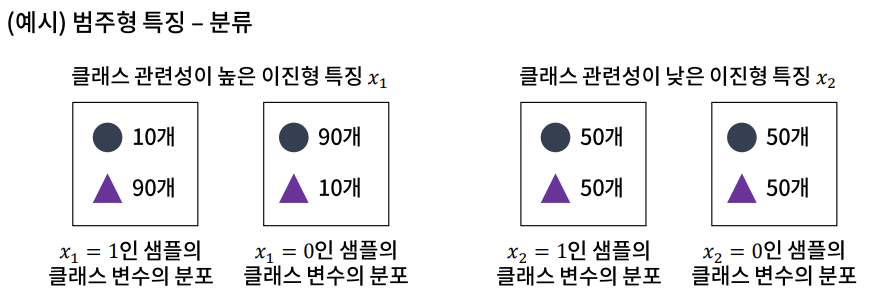

## 클래스 관련성 척도 예시: F- 통계량
- F-통계량은 ANOVA에서 사용하는 통계량으로, 집단간 평균 차이가 있는지를 측정하기 위한 통계량
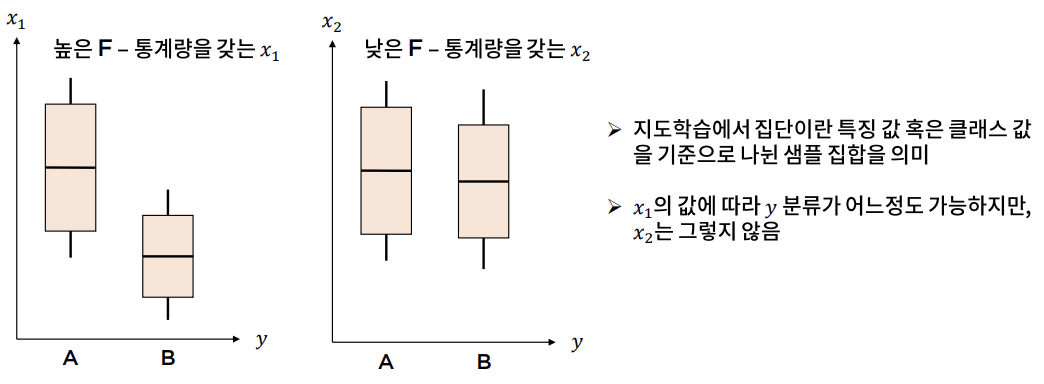

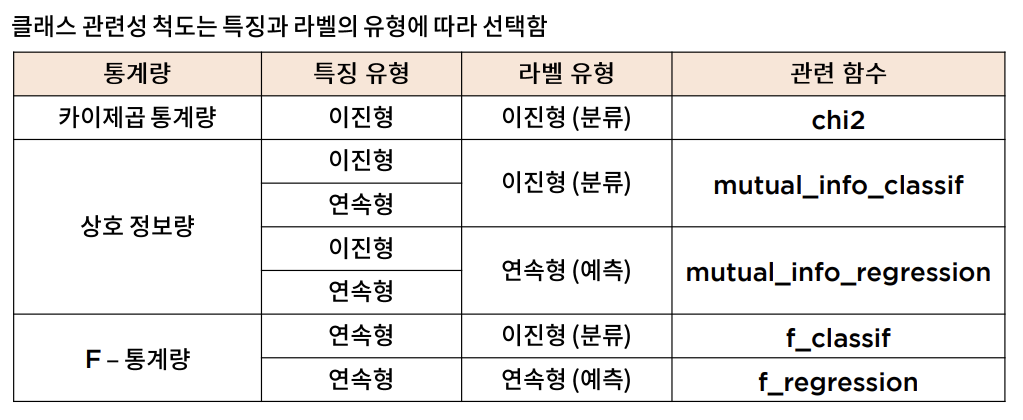

### sklearn.feature_selection.SelectKBest
- 주요 입력
  - scoring_func: 클래스 관련성 측정 함수 (예: chi2,mutual_info_classif, f_regression등)
  - k : 선택하는 특징 개수
- 주요 메서드
  - fit,transform, fit_transform: 특징을 선택하는데 사용하는 메서드
  - get_support():선택된 특징의 인덱스를 반환
- 주요 속성: scoring_func(X,Y)의 결과물과 같음
  - scores_:scoring_func으로 측정한 특징별 점수
  - pvalue_:scoring_func으로 측정한 특징별 p-value
  (1에 가까울수록 독립적이며, 0에 가까울수록 관련성이 높음)

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-5.-머신러닝-모델의-성능-향상을-위한-전처리\5. 머신러닝 모델의 성능 향상을 위한 전처리\데이터')

In [2]:
df = pd.read_csv("Sonar_Mines_Rocks.csv")

In [3]:
df.head()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R


In [4]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [5]:
Y.replace({"M":-1, "R":1}, inplace = True)

In [6]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [7]:
Train_X.shape # 샘플 대비 특징이 매우 많음 => 특징 선택 필요

(156, 60)

In [8]:
# 특징 선택 전 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.7317073170731708


In [9]:
# 특징 선택 수행
from sklearn.feature_selection import *
selector = SelectKBest(f_classif, k = 30)
selector.fit(Train_X, Train_Y)
selected_features = Train_X.columns[selector.get_support()]

s_Train_X = pd.DataFrame(selector.transform(Train_X), columns = selected_features)
s_Test_X = pd.DataFrame(selector.transform(Test_X), columns = selected_features)

# s_Train_X = Train_X[selected_features]
# s_Test_X = Test_X[selected_features]

In [10]:
# 특징 선택 후 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(s_Train_X, Train_Y)
pred_Y = model.predict(s_Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.7999999999999999


In [11]:
# 특징 개수 튜닝
best_score = 0
for k in range(5, 50, 5):    
    selector = SelectKBest(f_classif, k = k)
    selector.fit(Train_X, Train_Y)
    selected_features = Train_X.columns[selector.get_support()]

    s_Train_X = pd.DataFrame(selector.transform(Train_X), columns = selected_features)
    s_Test_X = pd.DataFrame(selector.transform(Test_X), columns = selected_features)   
    
    model = KNN().fit(s_Train_X, Train_Y)
    pred_Y = model.predict(s_Test_X)
    score = f1_score(Test_Y, pred_Y)
    if score > best_score:
        best_score = score
        best_k = k 

print(best_score, best_k)

0.8205128205128205 15
